In [1]:
import networkx as nx
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

### 1.  Create a nice looking graph of the political blog network

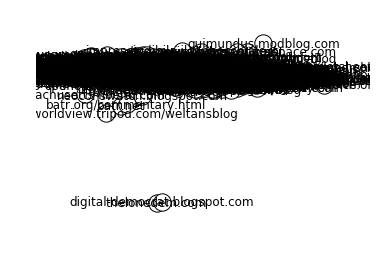

In [4]:
pos=nx.spring_layout(G)
nx.draw_networkx_labels(G,pos)
nx.draw(G, pos, node_color='w')

C:\Users\Touseef\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


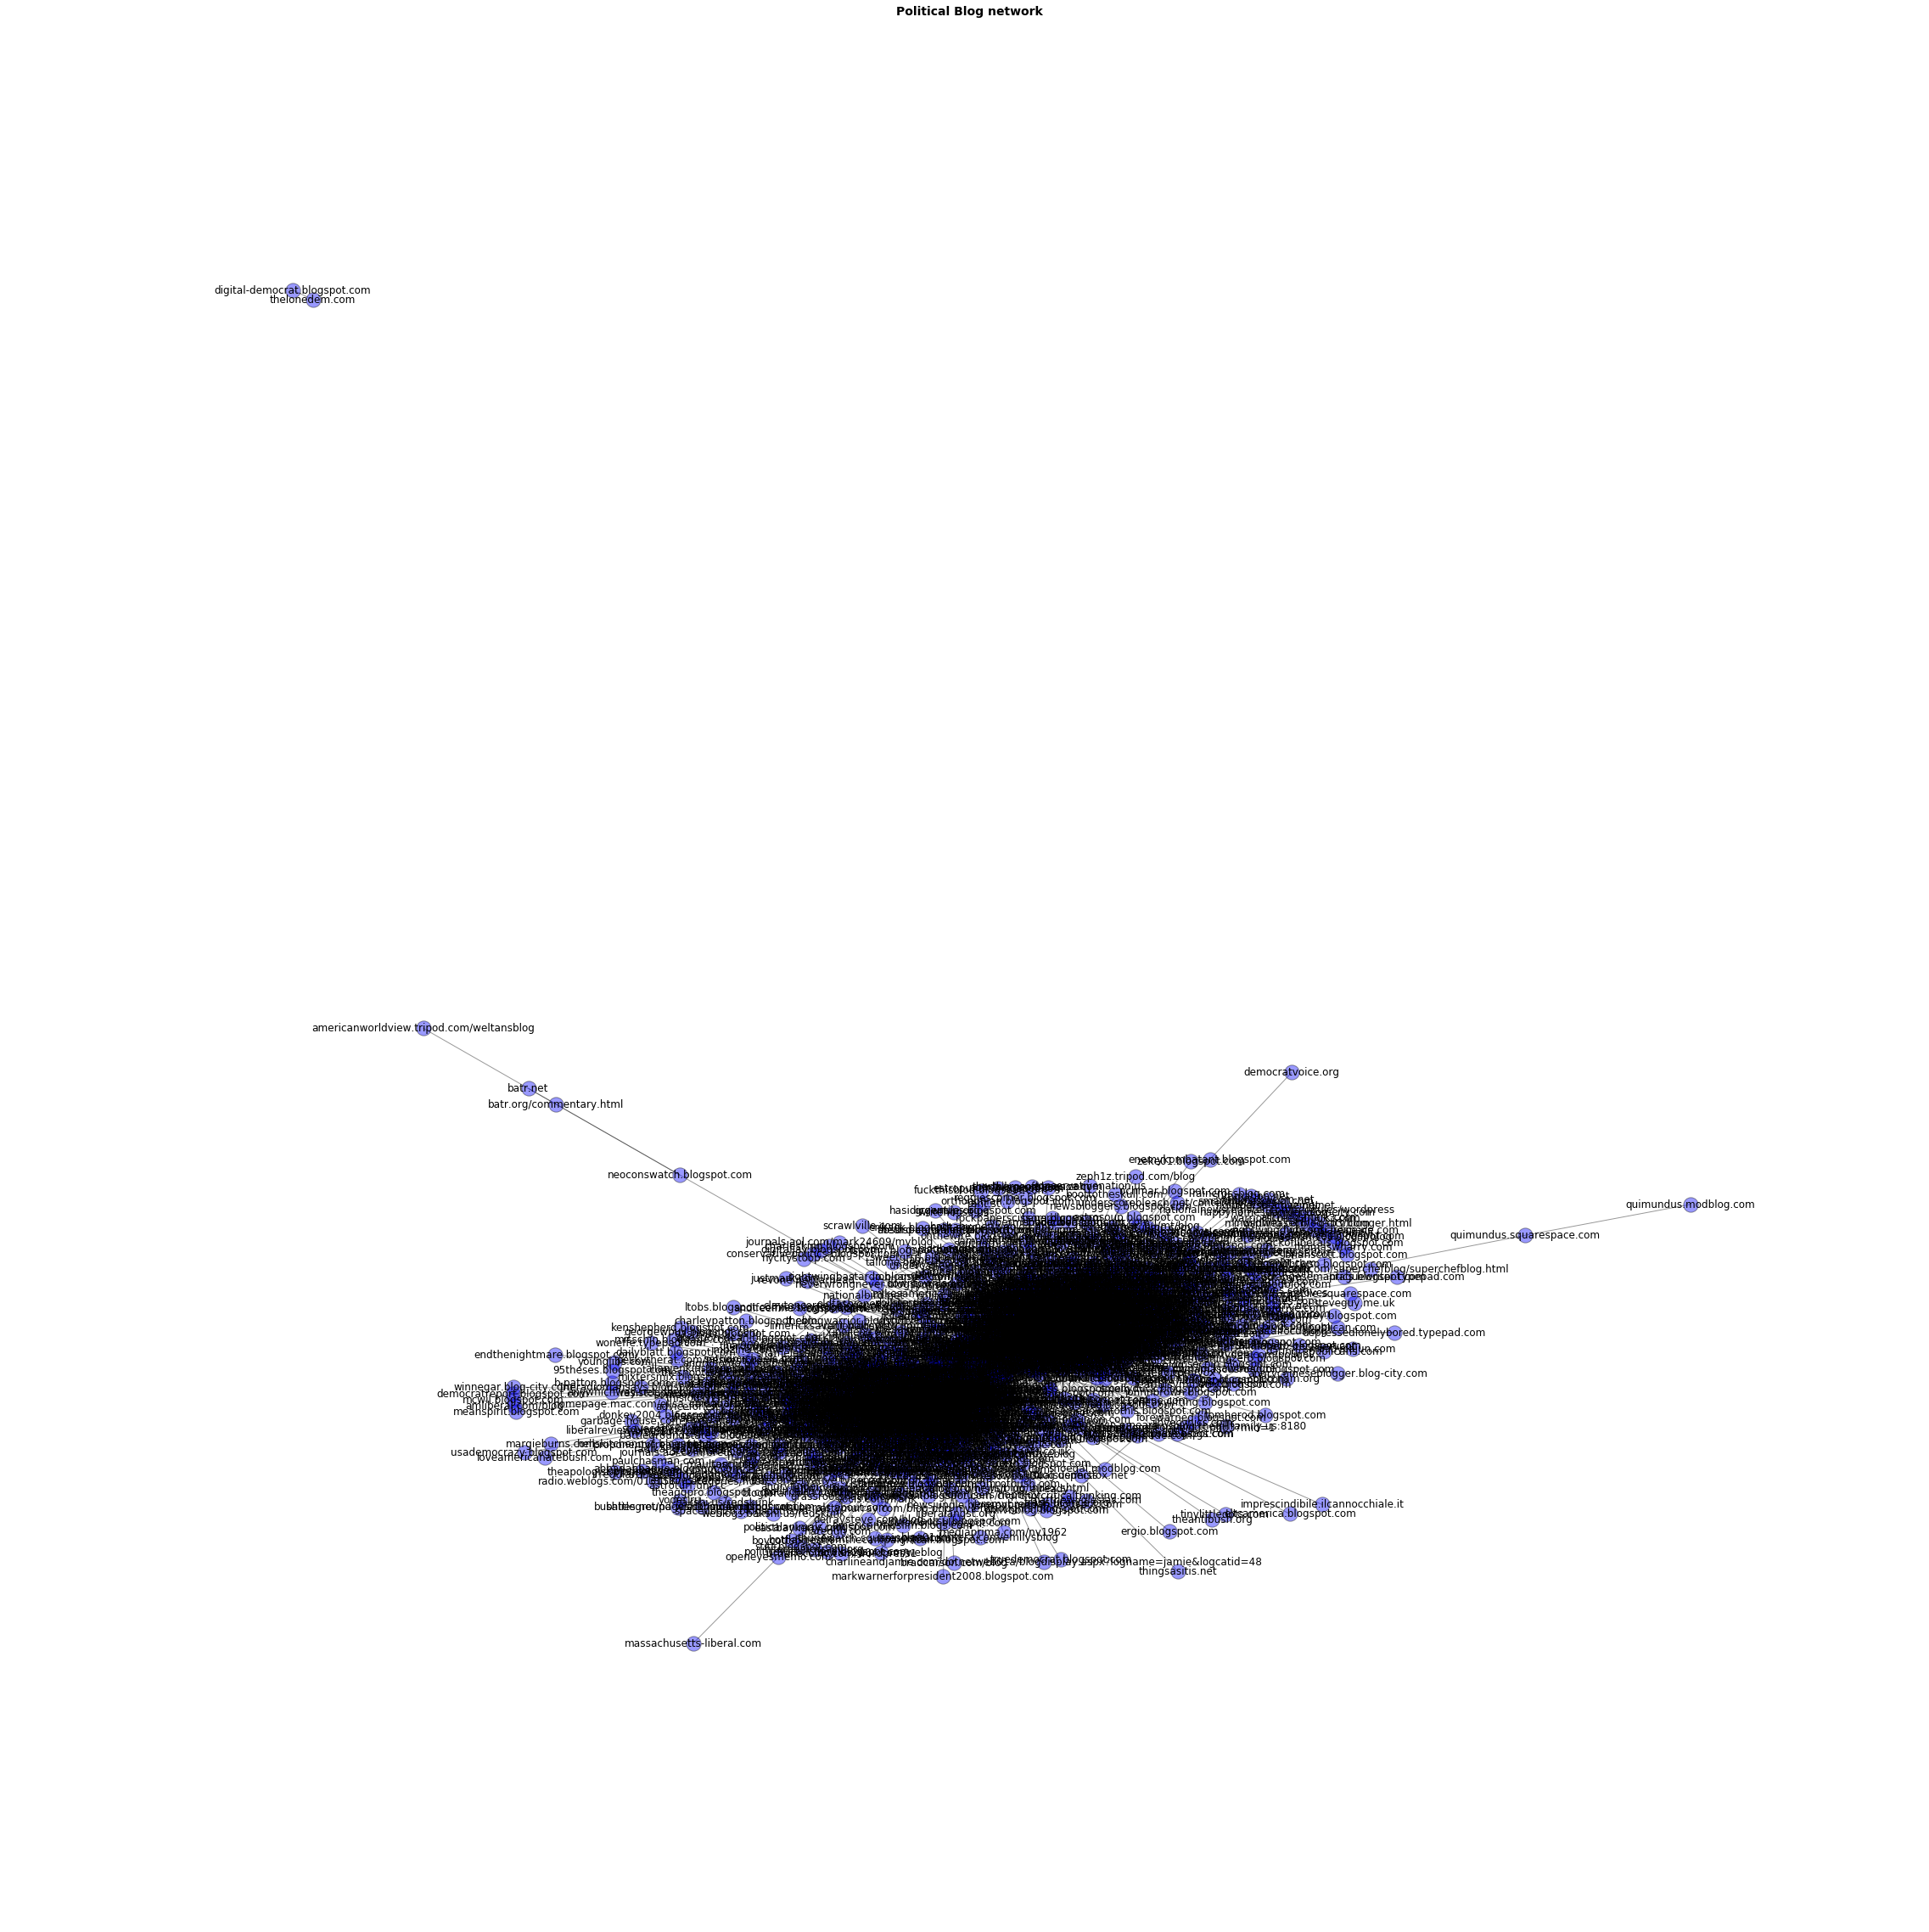

In [5]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blog network", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [6]:
centrality=nx.eigenvector_centrality(G)

In [7]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [8]:
most_blog=sorted(blog_list, key=lambda x: x[1], reverse=True)

In [9]:
most_blog

[(u'atrios.blogspot.com', 0.1948079793663771),
 (u'dailykos.com', 0.1608974020523483),
 (u'washingtonmonthly.com', 0.14653924259836879),
 (u'digbysblog.blogspot.com', 0.14264369221718307),
 (u'bodyandsoul.typepad.com', 0.14113489174330363),
 (u'liberaloasis.com', 0.1395237157110787),
 (u'tbogg.blogspot.com', 0.13703641699824257),
 (u'corrente.blogspot.com', 0.12941759274096148),
 (u'talkingpointsmemo.com', 0.12700519780790956),
 (u'dneiwert.blogspot.com', 0.12237564692546016),
 (u'pandagon.net', 0.12183624597295237),
 (u'billmon.org', 0.11749519874171402),
 (u'xnerg.blogspot.com', 0.11480053426058823),
 (u'madkane.com/notable.html', 0.11418196235451712),
 (u'elayneriggs.blogspot.com', 0.1126455958238381),
 (u'busybusybusy.com', 0.110244290938897),
 (u'michaelberube.com', 0.10608176183223589),
 (u'pacificviews.org', 0.10577419182137969),
 (u'nielsenhayden.com/electrolite', 0.10552543344289474),
 (u'instapundit.com', 0.10542786230862619),
 (u'prospect.org/weblog', 0.10434083652109472),
 

In [19]:
print 'The 10 most influential blogs are ==> ', [x[0] for x in most_blog[0:10]]

The 10 most influential blogs are ==>  [u'atrios.blogspot.com', u'dailykos.com', u'washingtonmonthly.com', u'digbysblog.blogspot.com', u'bodyandsoul.typepad.com', u'liberaloasis.com', u'tbogg.blogspot.com', u'corrente.blogspot.com', u'talkingpointsmemo.com', u'dneiwert.blogspot.com']


### 3.What are the 10 least influential blogs?

In [11]:
least_blog=sorted(blog_list, key=lambda x: x[1], reverse=False)

In [12]:
least_blog

[(u'thelonedem.com', 1.776325109755965e-72),
 (u'digital-democrat.blogspot.com', 1.776325109755965e-72),
 (u'americanworldview.tripod.com/weltansblog', 7.491540638916242e-09),
 (u'quimundus.modblog.com', 6.682929975006484e-08),
 (u'batr.org/commentary.html', 6.795517611554005e-07),
 (u'batr.net', 6.796325594929459e-07),
 (u'democratvoice.org', 1.0233388204113296e-06),
 (u'quimundus.squarespace.com', 6.061741218869531e-06),
 (u'massachusetts-liberal.com', 9.483365235734505e-06),
 (u'thingsasitis.net', 1.1736249650658606e-05),
 (u'loveamericahatebush.com', 2.0342028615381707e-05),
 (u'imprescindibile.ilcannocchiale.it', 2.3892545677495574e-05),
 (u'eltcamerica.blogspot.com', 2.836485902278943e-05),
 (u'usademocrazy.blogspot.com', 2.984438829543183e-05),
 (u'depressedlonelybored.typepad.com', 3.040150199384599e-05),
 (u'margieburns.com', 3.319916123051676e-05),
 (u'endthenightmare.blogspot.com', 3.588339764041677e-05),
 (u'democratreport.blogspot.com', 3.6215007017388404e-05),
 (u'meanspi

In [13]:
print 'The 10 least influential blogs are ==> ', [x[0] for x in least_blog[0:10]]

The 10 least influential blogs are ==>  [u'thelonedem.com', u'digital-democrat.blogspot.com', u'americanworldview.tripod.com/weltansblog', u'quimundus.modblog.com', u'batr.org/commentary.html', u'batr.net', u'democratvoice.org', u'quimundus.squarespace.com', u'massachusetts-liberal.com', u'thingsasitis.net']


### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

In [14]:
most_L = []
least_L = []
most_R = []
least_R = []
for (u, v) in most_blog:
    val = M.node.get(u)['value']
    if val == 0:
        most_L.append(u)
    elif val == 1:
        most_R.append(u)
        
for (u, v) in least_blog:
    val = M.node.get(u)['value']
    if val == 0:
        least_L.append(u)
    elif val == 1:
        least_R.append(u)

In [15]:
print '10 most influential left wing blogs ==> ', most_L[0:10]

10 most influential left wing blogs ==>  [u'atrios.blogspot.com', u'dailykos.com', u'washingtonmonthly.com', u'digbysblog.blogspot.com', u'bodyandsoul.typepad.com', u'liberaloasis.com', u'tbogg.blogspot.com', u'corrente.blogspot.com', u'talkingpointsmemo.com', u'dneiwert.blogspot.com']


In [16]:
print "10 most influential right wing blogs ==> ", most_R[0:10]

10 most influential right wing blogs ==>  [u'instapundit.com', u'vodkapundit.com', u'hughhewitt.com', u'powerlineblog.com', u'michellemalkin.com', u'blogsforbush.com', u'outsidethebeltway.com', u'balloon-juice.com', u'wizbangblog.com', u'volokh.com']


In [17]:
print "10 least influential left wing blogs ==> ", least_L[0:10]

10 least influential left wing blogs ==>  [u'thelonedem.com', u'digital-democrat.blogspot.com', u'democratvoice.org', u'massachusetts-liberal.com', u'thingsasitis.net', u'loveamericahatebush.com', u'eltcamerica.blogspot.com', u'usademocrazy.blogspot.com', u'margieburns.com', u'endthenightmare.blogspot.com']


In [18]:
print "10 least influential right wing blogs ==> ", least_R[0:10]

10 least influential right wing blogs ==>  [u'americanworldview.tripod.com/weltansblog', u'quimundus.modblog.com', u'batr.org/commentary.html', u'batr.net', u'quimundus.squarespace.com', u'imprescindibile.ilcannocchiale.it', u'depressedlonelybored.typepad.com', u'zeke01.blogspot.com', u'zeph1z.tripod.com/blog', u'neoconswatch.blogspot.com']
